In [12]:
import pandas as pd
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')

from features.data_provider import get_train_test_wc_dataset, get_feature_columns, get_whole_dataset

In [2]:
X_train, y_train, X_test, y_test, X_wc, y_wc = get_train_test_wc_dataset("home_win")

Dataset length 39008
Dataset complete cases length 6676
Whole train set length:  5601
Whole test set length:  1075
Whole WC set length:  128


<Figure size 1440x432 with 0 Axes>

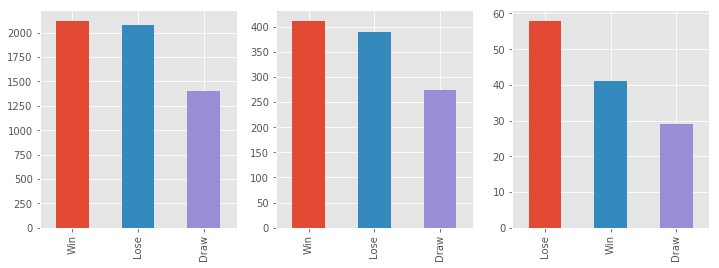

In [3]:
def get_labeled_df(s):
    df = pd.DataFrame(s)
    df[df["home_win"] == 1] = "Win"
    df[df["home_win"] == 0] = "Draw"
    df[df["home_win"] == -1] = "Lose"
    return df

plt.figure(figsize=(20, 6))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
pd.value_counts(get_labeled_df(y_train)["home_win"]).plot.bar(ax=axes[0])
pd.value_counts(get_labeled_df(y_test)["home_win"]).plot.bar(ax=axes[1])
pd.value_counts(get_labeled_df(y_wc)["home_win"]).plot.bar(ax=axes[2])

In [10]:
def get_feature_importance(clf):
    zipped = sorted(zip(get_feature_columns(), clf.feature_importances_), key = lambda t: t[1], reverse=True)
    for feature, importance in zipped:
        print(f"{feature}: {importance}")
        
def run_grid_search(clf, param_grid, Xtrain, ytrain, Xtest, ytest, X_wc, y_wc, custom_report_for_model=None):
    grid_search = GridSearchCV(clf, param_grid=param_grid)
    start = time()
    grid_search.fit(Xtrain, ytrain)
    print("TRAIN SET METRICS:")
    print("SCORE: ", grid_search.score(Xtrain, ytrain))
    y_true, y_pred = ytrain, grid_search.predict(Xtrain)
    print(classification_report(y_true, y_pred))
    print("BEST PARAMS: ", grid_search.best_params_)
    print()
    print()
    
    print("TEST SET METRICS:")
    print("SCORE: ", grid_search.score(Xtest, ytest))
    y_true, y_pred = ytest, grid_search.predict(Xtest)
    print("\n",classification_report(y_true, y_pred))
        
    print()
    print()
    print("WC SET METRICS:")
    print("SCORE: ", grid_search.score(X_wc, y_wc))
    y_true, y_pred = y_wc, grid_search.predict(X_wc)
    print("\n",classification_report(y_true, y_pred))
    
    print()
    print()
    if custom_report_for_model:
        custom_report_for_model(grid_search)
    return grid_search.best_estimator_

In [11]:
clf = RandomForestClassifier(oob_score=True, bootstrap=True, n_jobs=-1)

param_grid = {"n_estimators": [1000],
              "max_depth": [None],
              "min_samples_leaf": [5],
              "max_features": ["sqrt"],
              "criterion": ["gini"]}
best_clf = run_grid_search(clf, param_grid,
                             X_train, y_train, 
                             X_test, y_test, 
                             X_wc, y_wc,
                             custom_report_for_model=get_feature_importance)

TRAIN SET METRICS:
SCORE:  0.917693269059
             precision    recall  f1-score   support

       -1.0       0.90      0.94      0.92      2076
        0.0       0.99      0.85      0.91      1402
        1.0       0.89      0.94      0.92      2123

avg / total       0.92      0.92      0.92      5601

BEST PARAMS:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 1000}


TEST SET METRICS:
SCORE:  0.533953488372

              precision    recall  f1-score   support

       -1.0       0.51      0.72      0.60       389
        0.0       0.29      0.04      0.07       274
        1.0       0.58      0.68      0.63       412

avg / total       0.48      0.53      0.47      1075



WC SET METRICS:
SCORE:  0.5859375

              precision    recall  f1-score   support

       -1.0       0.64      0.71      0.67        58
        0.0       0.00      0.00      0.00        29
        1.0       0.54      0.83      0.65        41

a

NameError: name 'get_feature_columns' is not defined